# Analyse et détection de la dépression

In [1]:
#package et chargement fichiers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
demo = pd.read_csv("D:/git-projets/Depression-analysis/Demographic_symptom.csv", index_col = 0)


nettoyage des données

In [3]:
"""
intervalle de score attendus :

shaps : 14 à 56
psqi 0 à 21
madrs : 0 à 60
hamd 17 : 0 à 52
hamd 21 : 0 à 60
ham-a : 0 à 56
poms-tension : 0à 36
poms-depression : 0 à 60
poms-agressivité : 0 à48 
poms-fatigue : 0 à 28
poms-relation-pers : 0 à 28
poms-confusion : 0 à 28
poms-vigueur : 0 à 32
poms-total : -32 à 68
qids_sleep_score : 0 à 3
qids_appetite_score : 0 à 3
qids_psychomotor_score : 0 à 3
qids_total : 0 à 27

"""
#exploration
#afficher le détail du df
print(demo.head)
print(demo.info())


<bound method NDFrame.head of       batch   age     sex Diag  \
AA003   1st  45.0  Female   HC   
AA101   3rd  26.0  Female   HC   
AA115   1st  44.0  Female   HC   
AA296   2nd  27.0    Male   HC   
AA328   1st  51.0    Male  MDD   
...     ...   ...     ...  ...   
AN466   4th  28.0    Male  MDD   
AN736   4th  22.0  Female  MDD   
AN965   4th  29.0    Male  MDD   
AO427   4th  26.0    Male  MDD   
AO507   4th  23.0    Male  MDD   

                                     PrimaryDiagnosis  hs-CRP  shaps_score  \
AA003                      Healthy_Control,_High_Risk    0.40         25.0   
AA101                                 Healthy_Control     NaN         15.0   
AA115                                 Healthy_Control    6.90         16.0   
AA296                                 Healthy_Control    0.60         14.0   
AA328  Major_Depressive_Disorder,_Recurrent,_Moderate    1.60         24.0   
...                                               ...     ...          ...   
AN466          

In [4]:
#redéfinir le nom de la colonne hs-CRP
demo.rename(columns={'hs-CRP': 'hs_CRP'}, inplace=True)


In [5]:

#filtre des valeurs abberrantes

shaps_filter = (demo.shaps_score >= 14) & (demo.shaps_score <= 56)
psqi_filter = demo.psqi_score <= 21
madrs_filter = demo.madrs_score <= 60
hamd17_filter = demo.hamd_hamd17_score <= 52
hamd21_filter = demo.hamd_hamd21_score <= 60
hama_filter = demo.hama_score <= 56
poms_filter_tension = demo.poms_score_tension <= 36
poms_filter_depression = demo.poms_score_depression <= 60
poms_filter_anger = demo.poms_score_anger <= 48
poms_filter_fatigue = demo.poms_score_fatigue <= 28
poms_filter_friendliness = demo.poms_score_friendliness<=28
poms_filter_confusion = demo.poms_score_confusion <= 28
poms_filter_vigour = demo.poms_score_vigour <= 32
poms_filter_tmd = (demo.poms_score_tmd >= -32) & (demo.poms_score_tmd <= 168)
qids_sleep_filter = demo.qids_sleep_score <= 3
qids_appetite_filter = demo.qids_appetite_score <= 3
qids_psychomotor_filter = demo.qids_psychomotor_score <= 3
qids_filter = demo.qids_score <= 27
MADRS_Q1_filter = (demo.MADRS_Q1 >= 0) & (demo.MADRS_Q1 <= 6)
MADRS_Q2_filter = (demo.MADRS_Q2 >= 0) & (demo.MADRS_Q2 <= 6)
MADRS_Q3_filter = (demo.MADRS_Q3 >= 0) & (demo.MADRS_Q3 <= 6)
MADRS_Q4_filter = (demo.MADRS_Q4 >= 0) & (demo.MADRS_Q4 <= 6)
MADRS_Q5_filter = (demo.MADRS_Q5 >= 0) & (demo.MADRS_Q5 <= 6)
MADRS_Q6_filter = (demo.MADRS_Q6 >= 0) & (demo.MADRS_Q6 <= 6)
MADRS_Q7_filter = (demo.MADRS_Q7 >= 0) & (demo.MADRS_Q7 <= 6)
MADRS_Q8_filter = (demo.MADRS_Q8 >= 0) & (demo.MADRS_Q8 <= 6)
MADRS_Q9_filter = (demo.MADRS_Q9 >= 0) & (demo.MADRS_Q9 <= 6)
MADRS_Q10_filter = (demo.MADRS_Q10 >= 0) & (demo.MADRS_Q10 <= 6)

all_filter_abber = shaps_filter & psqi_filter & madrs_filter & hamd17_filter & hamd21_filter & hama_filter & poms_filter_tension & poms_filter_depression & poms_filter_anger & poms_filter_fatigue & poms_filter_friendliness & poms_filter_confusion & poms_filter_vigour & poms_filter_tmd & qids_sleep_filter & qids_appetite_filter & qids_psychomotor_filter & qids_filter & MADRS_Q1_filter & MADRS_Q2_filter & MADRS_Q3_filter & MADRS_Q4_filter & MADRS_Q5_filter & MADRS_Q6_filter & MADRS_Q7_filter & MADRS_Q8_filter & MADRS_Q9_filter & MADRS_Q10_filter



In [6]:
#suppression des valeurs manquantes
nna_hs_CRP = demo.hs_CRP.notna()
shaps_nna = demo.shaps_score.notna()
psqi_nna = demo.psqi_score.notna()
madrs_nna = demo.madrs_score.notna()
hamd17_nna = demo.hamd_hamd17_score.notna()
hamd21_nna = demo.hamd_hamd21_score.notna()
hama_nna = demo.hama_score.notna()
poms_nna_tension = demo.poms_score_tension.notna()
poms_nna_depression = demo.poms_score_depression.notna()
poms_nna_anger = demo.poms_score_anger.notna()
poms_nna_fatigue = demo.poms_score_fatigue.notna()
poms_nna_friendliness = demo.poms_score_friendliness.notna()
poms_nna_confusion = demo.poms_score_confusion.notna()
poms_nna_vigour = demo.poms_score_vigour.notna()
poms_nna_tmd = demo.poms_score_tmd.notna()
qids_nna_psychomotor = demo.qids_psychomotor_score.notna()
qids_nna_sleep = demo.qids_sleep_score.notna()
qids_nna_appetite = demo.qids_appetite_score.notna()
qids_nna = demo.qids_score.notna()
MADRS_Q1_nna = demo.MADRS_Q1.notna()
MADRS_Q2_nna = demo.MADRS_Q2.notna()
MADRS_Q3_nna = demo.MADRS_Q3.notna()
MADRS_Q4_nna = demo.MADRS_Q4.notna()
MADRS_Q5_nna = demo.MADRS_Q5.notna()
MADRS_Q6_nna = demo.MADRS_Q6.notna()
MADRS_Q7_nna= demo.MADRS_Q7.notna()
MADRS_Q8_nna = demo.MADRS_Q8.notna()
MADRS_Q9_nna = demo.MADRS_Q9.notna()
MADRS_Q10_nna = demo.MADRS_Q10.notna()
ctq_denial_nna = demo.ctq_denial_score.notna()
ctq_emoabuse_nna = demo.ctq_emoabuse_score.notna()
ctq_emoneglect_nna = demo.ctq_emoneglect_score.notna()
ctq_physabuse_nna = demo.ctq_physabuse_score.notna()
ctq_physneglect_nna = demo.ctq_physneglect_score.notna()
ctq_sexabuse_nna = demo.ctq_sexabuse_score.notna()
ctq_score_nna = demo.ctq_score.notna()
tci_coop_nna = demo.tci_coop_score.notna()
tci_harmavoid_nna = demo.tci_harmavoid_score.notna()
tci_noveltyseek_nna = demo.tci_noveltyseek_score.notna()
tci_persistence_nna = demo.tci_persistence_score.notna()
tci_rewarddep_nna = demo.tci_rewarddep_score.notna()
tci_selfdirect_nna = demo.tci_selfdirect_score.notna()
tci_selftranscend_nna = demo.tci_selftranscend_score.notna()
tci_impulsivity_nna = demo.tci_impulsivity_score.notna()
PrimaryDiagnosis_nna = demo.PrimaryDiagnosis.notna()

all_nna_spd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna
all_nna_pd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna & PrimaryDiagnosis_nna


In [7]:
#création des dataset spd et pd
all_filter_spd = all_nna_spd & all_filter_abber
all_filter_pd = all_nna_pd & all_filter_abber

demo_net_spd = demo[all_filter_spd]
demo_net_pd = demo[all_filter_pd]

demo_net_spd = demo_net_spd.drop(["PrimaryDiagnosis"], axis=1)
demo_net_spd.info()
demo_net_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                      123 non-null object
age                        123 non-null float64
sex                        123 non-null object
Diag                       123 non-null object
hs_CRP                     123 non-null float64
shaps_score                123 non-null float64
psqi_score                 123 non-null float64
ctq_denial_score           123 non-null float64
ctq_emoabuse_score         123 non-null float64
ctq_emoneglect_score       123 non-null float64
ctq_physabuse_score        123 non-null float64
ctq_physneglect_score      123 non-null float64
ctq_sexabuse_score         123 non-null float64
ctq_score                  123 non-null float64
madrs_score                123 non-null float64
hamd_hamd17_score          123 non-null float64
hamd_hamd21_score          123 non-null float64
hama_score                 123 non-null float64
poms_score_tension         123 no

In [8]:
#renommer les colonnes des questions madrs
demo_net_spd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)

demo_net_pd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)


c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


ANALYSE DE DONNEES

STAT A PARTIR DU DATASET SANS PRIMARY DIAGNOSIS

In [9]:
#create crosstab sex diag
t = pd.crosstab(demo_net_spd.Diag, "freq")
s = pd.crosstab(demo_net_spd.sex, "freq")
print(t)
print(s)


col_0  freq
Diag       
HC       74
MDD      49
col_0   freq
sex         
Female    67
Male      56


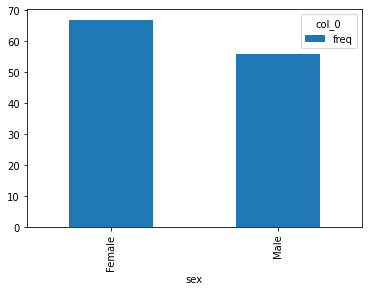

In [10]:

# Create bar diag of Diag sex
s.plot.bar()
plt.show()


il y légèrement plus de femmes que d'hommes. + 10 de femmes que d'hommes

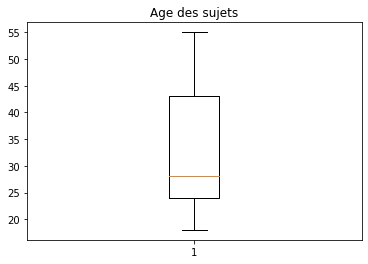

In [11]:
plt.boxplot(demo_net_spd.age)
plt.title('Age des sujets')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FBFBEF640>,
      dtype=object)

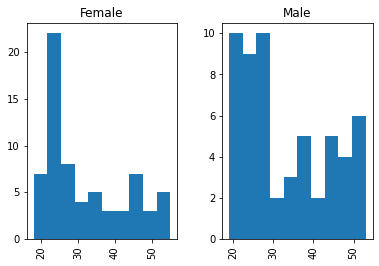

In [12]:
demo_net_spd.hist(column='age',by='sex')

la disparité des ages des hommes est plus homogène que chez les femmes. on observe un pic de 20 femmes entre 23 et 25 ans. 

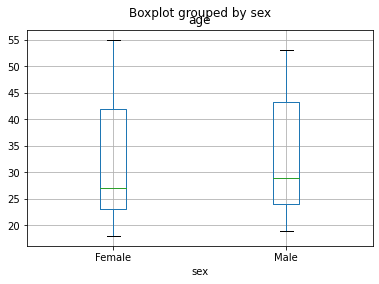

In [13]:
demo_net_spd.boxplot(column='age',by='sex')

La médiane des ages chez les femmes est à 27 ans, chez les hommes elle est à 29 ans. la population des femmes est légèrement plus jeune

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FBFD1F070>,
      dtype=object)

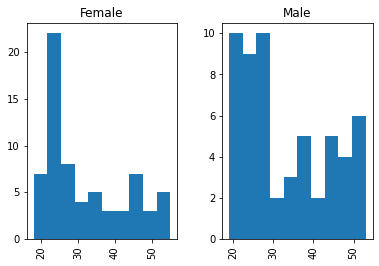

In [14]:

demo_net_spd.hist(column='age',by='sex')

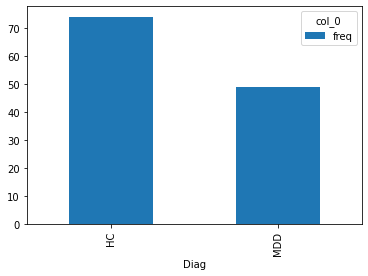

In [15]:
t.plot.bar()
plt.show()


on observe plus d'individus diagnostiqués sans dépression que d'individus souffrant de dépression.

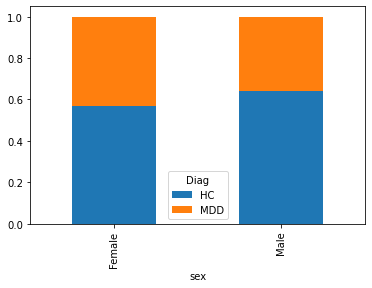

In [16]:
ct = pd.crosstab(demo_net_spd['sex'],demo_net_spd['Diag'],normalize='index')
ct.plot.bar(stacked=True)

près de la moitié des femmes est diagnostiquée en dépression. près d'1/3 des hommes est diagnostiqué en dépression

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FBFEAE1C0>,
      dtype=object)

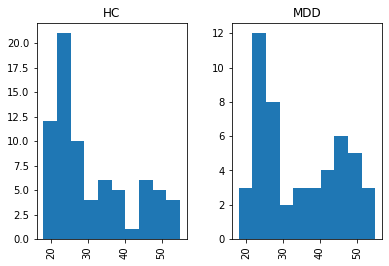

In [17]:
demo_net_spd.hist(column='age',by='Diag')

on observe plus de personnes diagnostiquées positives à partir de 40 ans, par rapport à la dispersion du groupe contrôle.

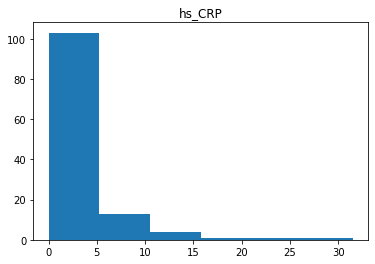

In [18]:
plt.hist(demo_net_spd.hs_CRP, bins = 6)
plt.title("hs_CRP")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FBFF80520>,
      dtype=object)

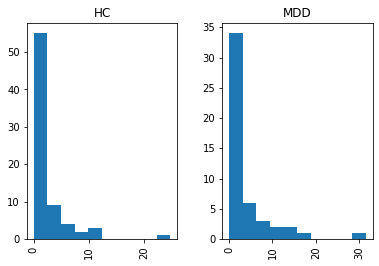

In [19]:
demo_net_spd.hist(column='hs_CRP',by='Diag')

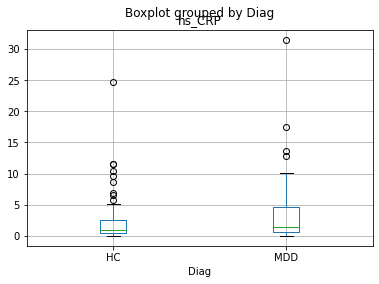

In [20]:
demo_net_spd.boxplot(column='hs_CRP',by='Diag')

Le score de hs-CRP peut être plus élevé pour les personnes diagnostiquées en dépression.

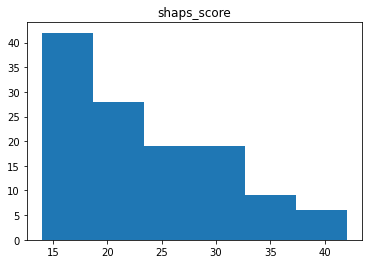

In [21]:
plt.hist(demo_net_spd.shaps_score, bins = 6)
plt.title("shaps_score")
plt.show()

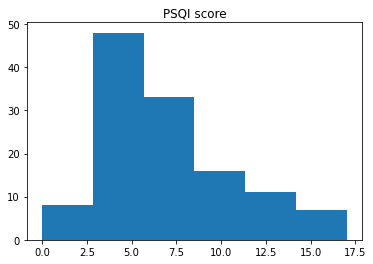

In [22]:
plt.hist(demo_net_spd.psqi_score, bins=6)
plt.title('PSQI score')
plt.show()

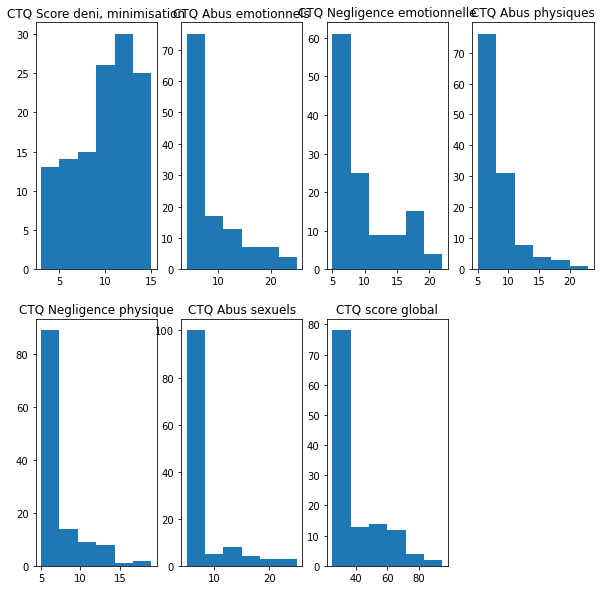

In [23]:

fig1 = plt.figure(figsize=(10,10))
ax11 = fig1.add_subplot(2,4,1)
ax21 = fig1.add_subplot(2,4,2)
ax31 = fig1.add_subplot(2,4,3)
ax41 = fig1.add_subplot(2,4,4)
ax51 = fig1.add_subplot(2,4,5)
ax61 = fig1.add_subplot(2,4,6)
ax71 = fig1.add_subplot(2,4,7)
ax11.title.set_text('CTQ Score deni, minimisation')
ax21.title.set_text('CTQ Abus emotionnels')
ax31.title.set_text('CTQ Negligence emotionnelle')
ax41.title.set_text('CTQ Abus physiques')
ax51.title.set_text('CTQ Negligence physique')
ax61.title.set_text('CTQ Abus sexuels')
ax71.title.set_text('CTQ score global')
ax11.hist(demo_net_spd.ctq_denial_score,bins = 6)
ax21.hist(demo_net_spd.ctq_emoabuse_score,bins = 6)
ax31.hist(demo_net_spd.ctq_emoneglect_score,bins = 6)
ax41.hist(demo_net_spd.ctq_physabuse_score,bins = 6)
ax51.hist(demo_net_spd.ctq_physneglect_score,bins = 6)
ax61.hist(demo_net_spd.ctq_sexabuse_score,bins = 6)
ax71.hist(demo_net_spd.ctq_score,bins = 6)
plt.show()

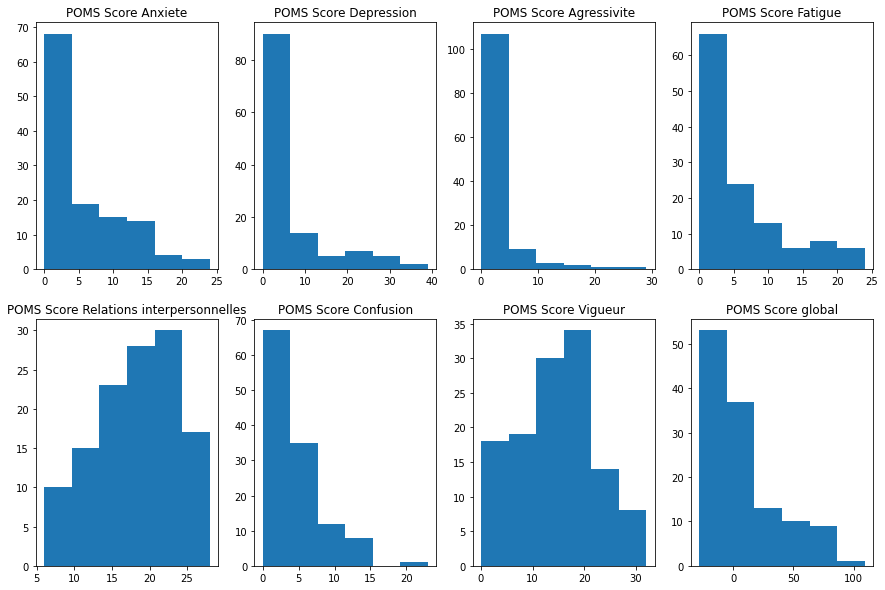

In [24]:

fig3 = plt.figure(figsize=(15,10))
ax12 = fig3.add_subplot(2,4,1)
ax22 = fig3.add_subplot(2,4,2)
ax32 = fig3.add_subplot(2,4,3)
ax42 = fig3.add_subplot(2,4,4)
ax52 = fig3.add_subplot(2,4,5)
ax62 = fig3.add_subplot(2,4,6)
ax72 = fig3.add_subplot(2,4,7)
ax82 = fig3.add_subplot(2,4,8)
ax12.title.set_text('POMS Score Anxiete')
ax22.title.set_text('POMS Score Depression')
ax32.title.set_text('POMS Score Agressivite')
ax42.title.set_text('POMS Score Fatigue')
ax52.title.set_text('POMS Score Relations interpersonnelles')
ax62.title.set_text('POMS Score Confusion')
ax72.title.set_text('POMS Score Vigueur')
ax82.title.set_text('POMS Score global')
ax12.hist(demo_net_spd.poms_score_tension,bins = 6)
ax22.hist(demo_net_spd.poms_score_depression,bins = 6)
ax32.hist(demo_net_spd.poms_score_anger,bins = 6)
ax42.hist(demo_net_spd.poms_score_fatigue,bins = 6)
ax52.hist(demo_net_spd.poms_score_friendliness,bins = 6)
ax62.hist(demo_net_spd.poms_score_confusion,bins = 6)
ax72.hist(demo_net_spd.poms_score_vigour,bins = 6)
ax82.hist(demo_net_spd.poms_score_tmd,bins = 6)
plt.show()

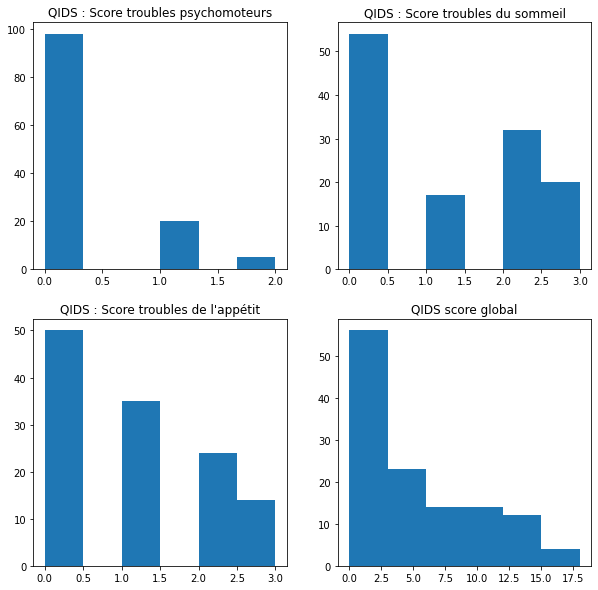

In [25]:
fig2 = plt.figure(figsize=(10,10))
ax10 = fig2.add_subplot(2,2,1)
ax20 = fig2.add_subplot(2,2,2)
ax30 = fig2.add_subplot(2,2,3)
ax40 = fig2.add_subplot(2,2,4)
ax10.title.set_text('QIDS : Score troubles psychomoteurs')
ax20.title.set_text('QIDS : Score troubles du sommeil')
ax30.title.set_text("QIDS : Score troubles de l'appétit")
ax40.title.set_text('QIDS score global')
ax10.hist(demo_net_spd.qids_psychomotor_score,bins = 6)
ax20.hist(demo_net_spd.qids_sleep_score,bins = 6)
ax30.hist(demo_net_spd.qids_appetite_score,bins = 6)
ax40.hist(demo_net_spd.qids_score,bins = 6)
plt.show()

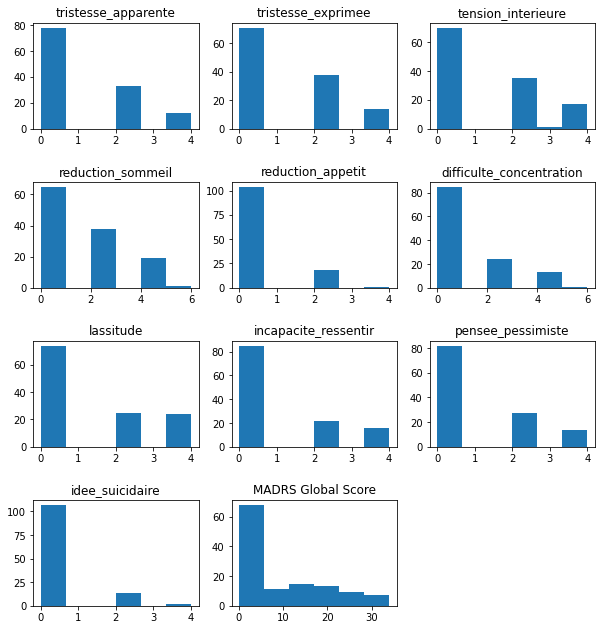

In [26]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.title.set_text('tristesse_apparente')
ax2.title.set_text('tristesse_exprimee')
ax3.title.set_text('tension_interieure')
ax4.title.set_text('reduction_sommeil')
ax5.title.set_text('reduction_appetit')
ax6.title.set_text('difficulte_concentration')
ax7.title.set_text('lassitude')
ax8.title.set_text('incapacite_ressentir')
ax9.title.set_text('pensee_pessimiste')
ax10.title.set_text('idee_suicidaire')
ax1.hist(demo_net_spd.tristesse_apparente,bins = 6)
ax2.hist(demo_net_spd.tristesse_exprimee,bins = 6)
ax3.hist(demo_net_spd.tension_interieure,bins = 6)
ax4.hist(demo_net_spd.reduction_sommeil,bins = 6)
ax5.hist(demo_net_spd.reduction_appetit,bins = 6)
ax6.hist(demo_net_spd.difficulte_concentration,bins = 6)
ax7.hist(demo_net_spd.lassitude,bins = 6)
ax8.hist(demo_net_spd.incapacite_ressentir,bins = 6)
ax9.hist(demo_net_spd.pensee_pessimiste,bins = 6)
ax10.hist(demo_net_spd.idee_suicidaire,bins = 6)
ax11 = fig.add_subplot(4,3,11)
ax11.title.set_text('MADRS Global Score')
ax11.hist(demo_net_spd.madrs_score, bins=6)
fig.subplots_adjust(left=0.12, bottom=0.11, right=0.90, top=0.92, wspace=0.2, hspace=0.5)
plt.show()


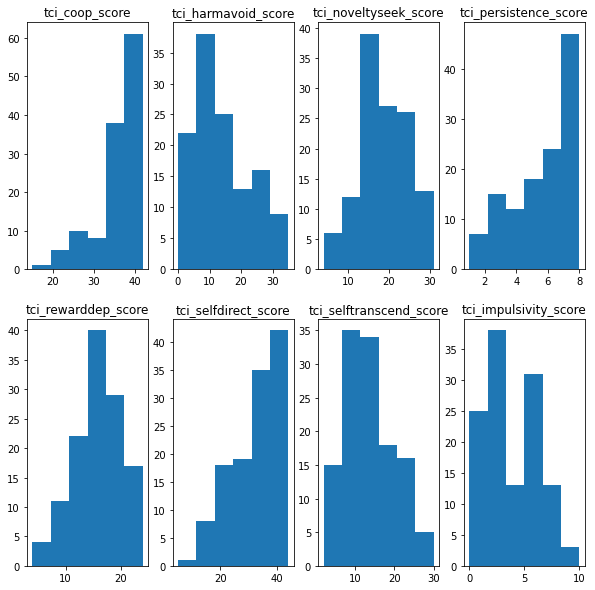

In [27]:

fag = plt.figure(figsize=(10,10))
az1 = fag.add_subplot(2,4,1)
az2 = fag.add_subplot(2,4,2)
az3 = fag.add_subplot(2,4,3)
az4 = fag.add_subplot(2,4,4)
az5 = fag.add_subplot(2,4,5)
az6 = fag.add_subplot(2,4,6)
az7 = fag.add_subplot(2,4,7)
az8 = fag.add_subplot(2,4,8)
az1.title.set_text('tci_coop_score')
az2.title.set_text('tci_harmavoid_score')
az3.title.set_text('tci_noveltyseek_score')
az4.title.set_text('tci_persistence_score')
az5.title.set_text('tci_rewarddep_score')
az6.title.set_text('tci_selfdirect_score')
az7.title.set_text('tci_selftranscend_score')
az8.title.set_text('tci_impulsivity_score')
az1.hist(demo_net_spd.tci_coop_score,bins = 6)
az2.hist(demo_net_spd.tci_harmavoid_score,bins = 6)
az3.hist(demo_net_spd.tci_noveltyseek_score,bins = 6)
az4.hist(demo_net_spd.tci_persistence_score,bins = 6)
az5.hist(demo_net_spd.tci_rewarddep_score,bins = 6)
az6.hist(demo_net_spd.tci_selfdirect_score,bins = 6)
az7.hist(demo_net_spd.tci_selftranscend_score,bins = 6)
az8.hist(demo_net_spd.tci_impulsivity_score,bins = 6)
plt.show()


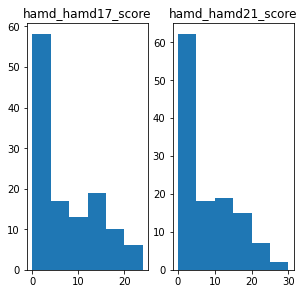

In [28]:
fog = plt.figure(figsize=(10,10))
az11 = fog.add_subplot(2,4,1)
az12 = fog.add_subplot(2,4,2)
az11.title.set_text('hamd_hamd17_score')
az12.title.set_text('hamd_hamd21_score')
az11.hist(demo_net_spd.hamd_hamd17_score,bins = 6)
az12.hist(demo_net_spd.hamd_hamd21_score,bins = 6)

plt.show()

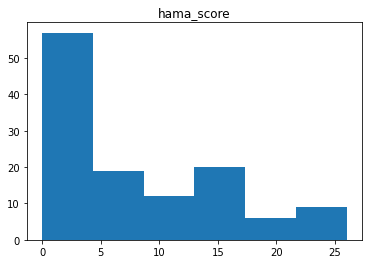

In [29]:
plt.hist(demo_net_spd.hama_score,bins = 6)
plt.title("hama_score")
plt.show()



In [30]:
#some statistics

print(demo_net_spd.describe(include='all'))

       batch         age     sex Diag      hs_CRP  shaps_score  psqi_score  \
count    123  123.000000     123  123  123.000000   123.000000  123.000000   
unique     4         NaN       2    2         NaN          NaN         NaN   
top      2nd         NaN  Female   HC         NaN          NaN         NaN   
freq      33         NaN      67   74         NaN          NaN         NaN   
mean     NaN   32.373984     NaN  NaN    3.025935    22.845528    6.894309   
std      NaN   10.812408     NaN  NaN    4.654423     7.220227    3.819306   
min      NaN   18.000000     NaN  NaN    0.000000    14.000000    0.000000   
25%      NaN   24.000000     NaN  NaN    0.500000    16.000000    4.000000   
50%      NaN   28.000000     NaN  NaN    1.300000    23.000000    6.000000   
75%      NaN   43.000000     NaN  NaN    3.350000    28.000000    9.000000   
max      NaN   55.000000     NaN  NaN   31.500000    42.000000   17.000000   

        ctq_denial_score  ctq_emoabuse_score  ctq_emoneglect_sc

Sélection de variable

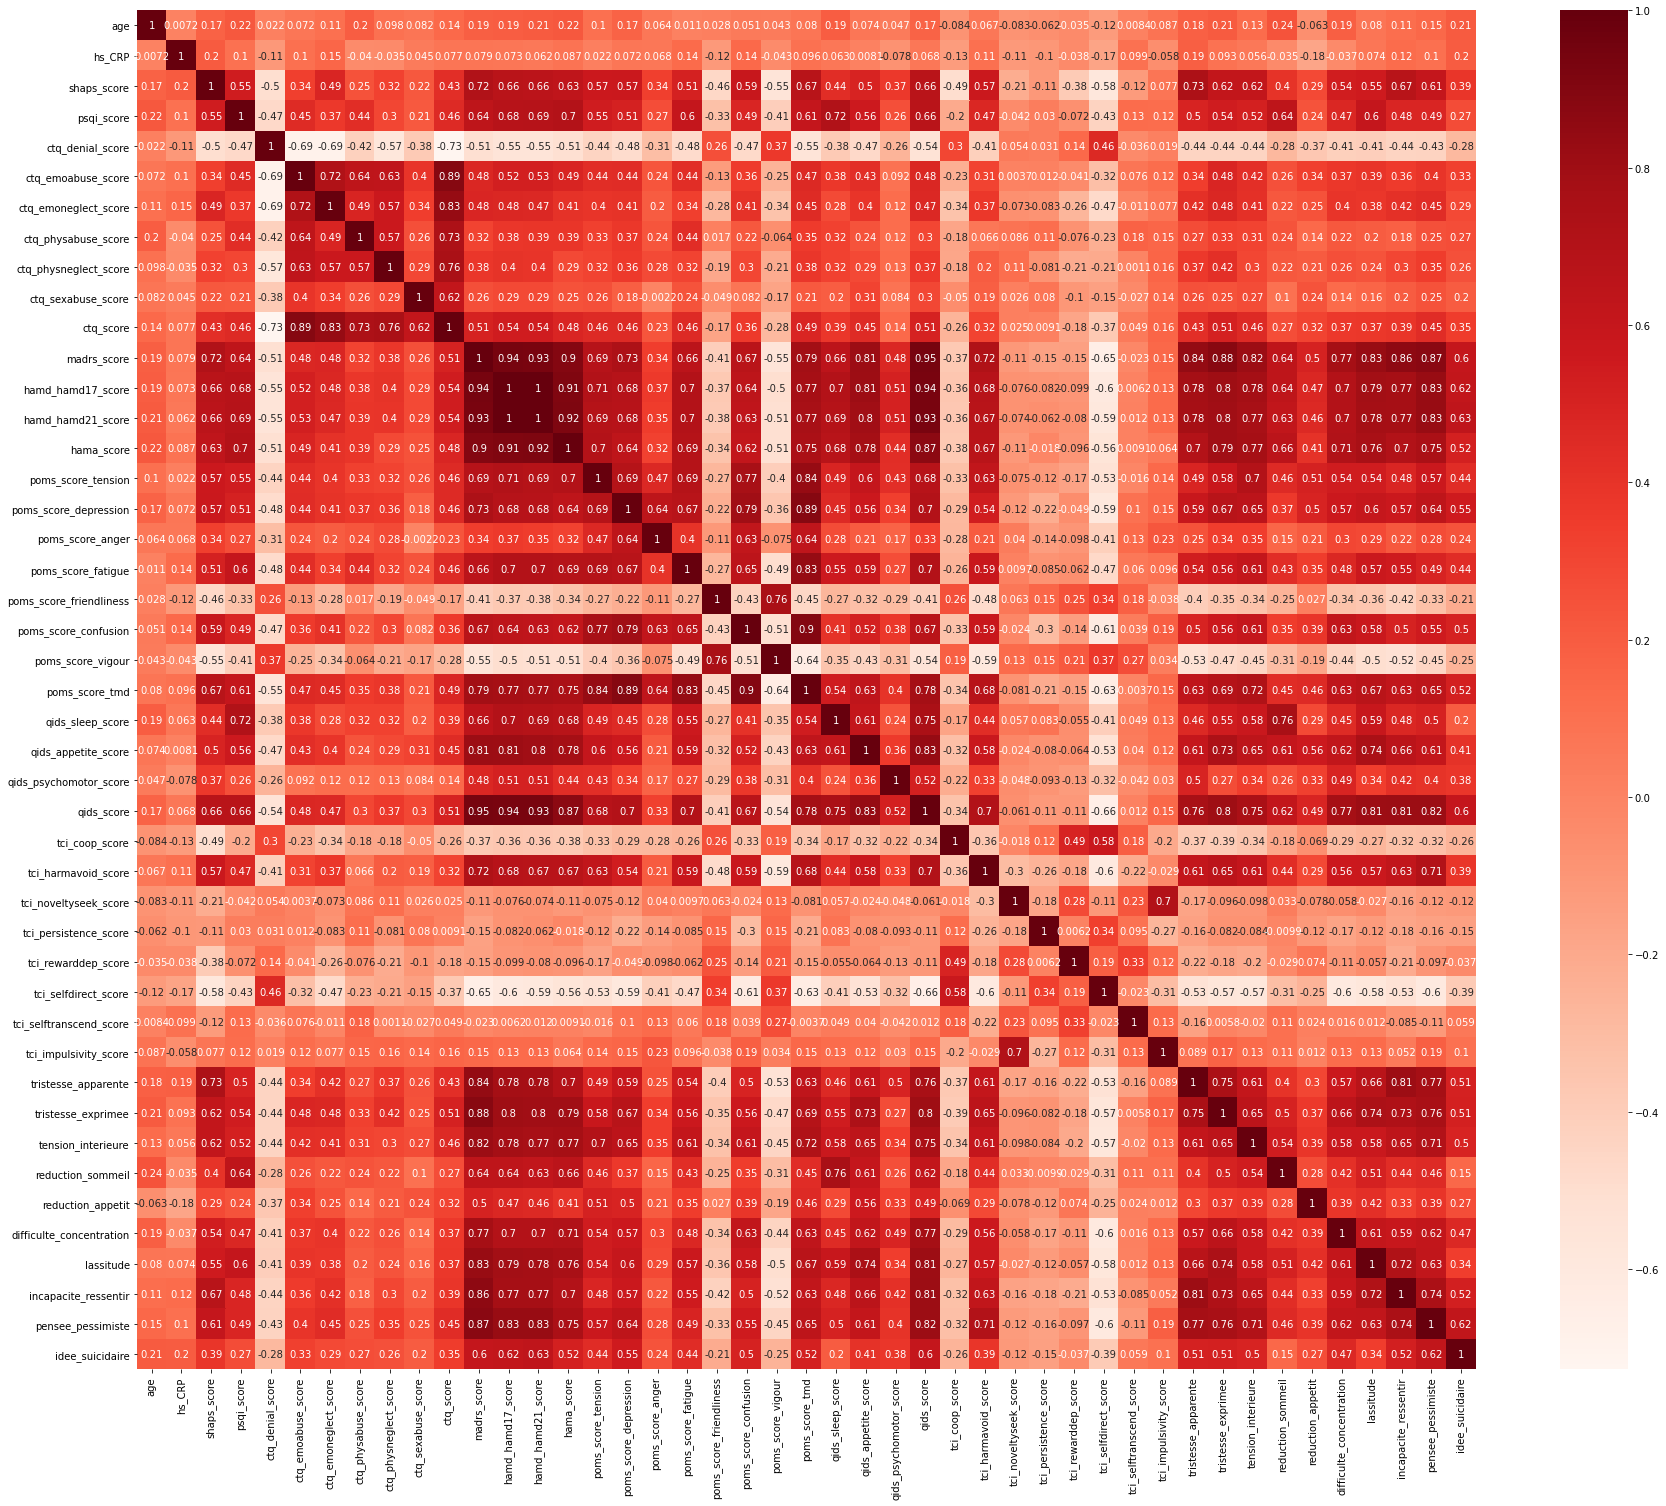

In [31]:
# matrice de corrélation
plt.figure(figsize=(30,25))
cor = demo_net_spd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [32]:
#Correlation with output variable
cor_target = abs(cor["hs_CRP"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

hs_CRP    1.0
Name: hs_CRP, dtype: float64

In [33]:
#Correlation with output variable
cor_target = abs(cor["age"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

age    1.0
Name: age, dtype: float64

In [34]:
#Correlation with output variable
cor_target = abs(cor["tci_selftranscend_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_selftranscend_score    1.0
Name: tci_selftranscend_score, dtype: float64

In [35]:
#Correlation with output variable
cor_target = abs(cor["qids_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score                 0.945975
hamd_hamd17_score           0.936099
hamd_hamd21_score           0.933625
hama_score                  0.871623
poms_score_depression       0.700413
poms_score_tmd              0.777933
qids_sleep_score            0.746338
qids_appetite_score         0.831769
qids_score                  1.000000
tci_harmavoid_score         0.703901
tristesse_apparente         0.758791
tristesse_exprimee          0.799743
tension_interieure          0.746232
difficulte_concentration    0.773758
lassitude                   0.806249
incapacite_ressentir        0.811192
pensee_pessimiste           0.816728
Name: qids_score, dtype: float64

In [36]:
#Correlation with output variable
cor_target = abs(cor["tci_selfdirect_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

madrs_score                 0.651161
hamd_hamd17_score           0.602647
poms_score_confusion        0.614257
poms_score_tmd              0.627582
qids_score                  0.659401
tci_harmavoid_score         0.600983
tci_selfdirect_score        1.000000
difficulte_concentration    0.600431
pensee_pessimiste           0.602537
Name: tci_selfdirect_score, dtype: float64

In [37]:
#Correlation with output variable
cor_target = abs(cor["ctq_denial_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

ctq_denial_score    1.000000
ctq_score           0.727377
Name: ctq_denial_score, dtype: float64

In [38]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

In [39]:
var_quanti = demo_net_spd.drop(['batch','sex'], 1)

print(var_quanti.info())


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 46 columns):
age                         123 non-null float64
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tension          123 non-null float64
poms_score_depression       123 non-null float64
poms_score_an

c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\bedda\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

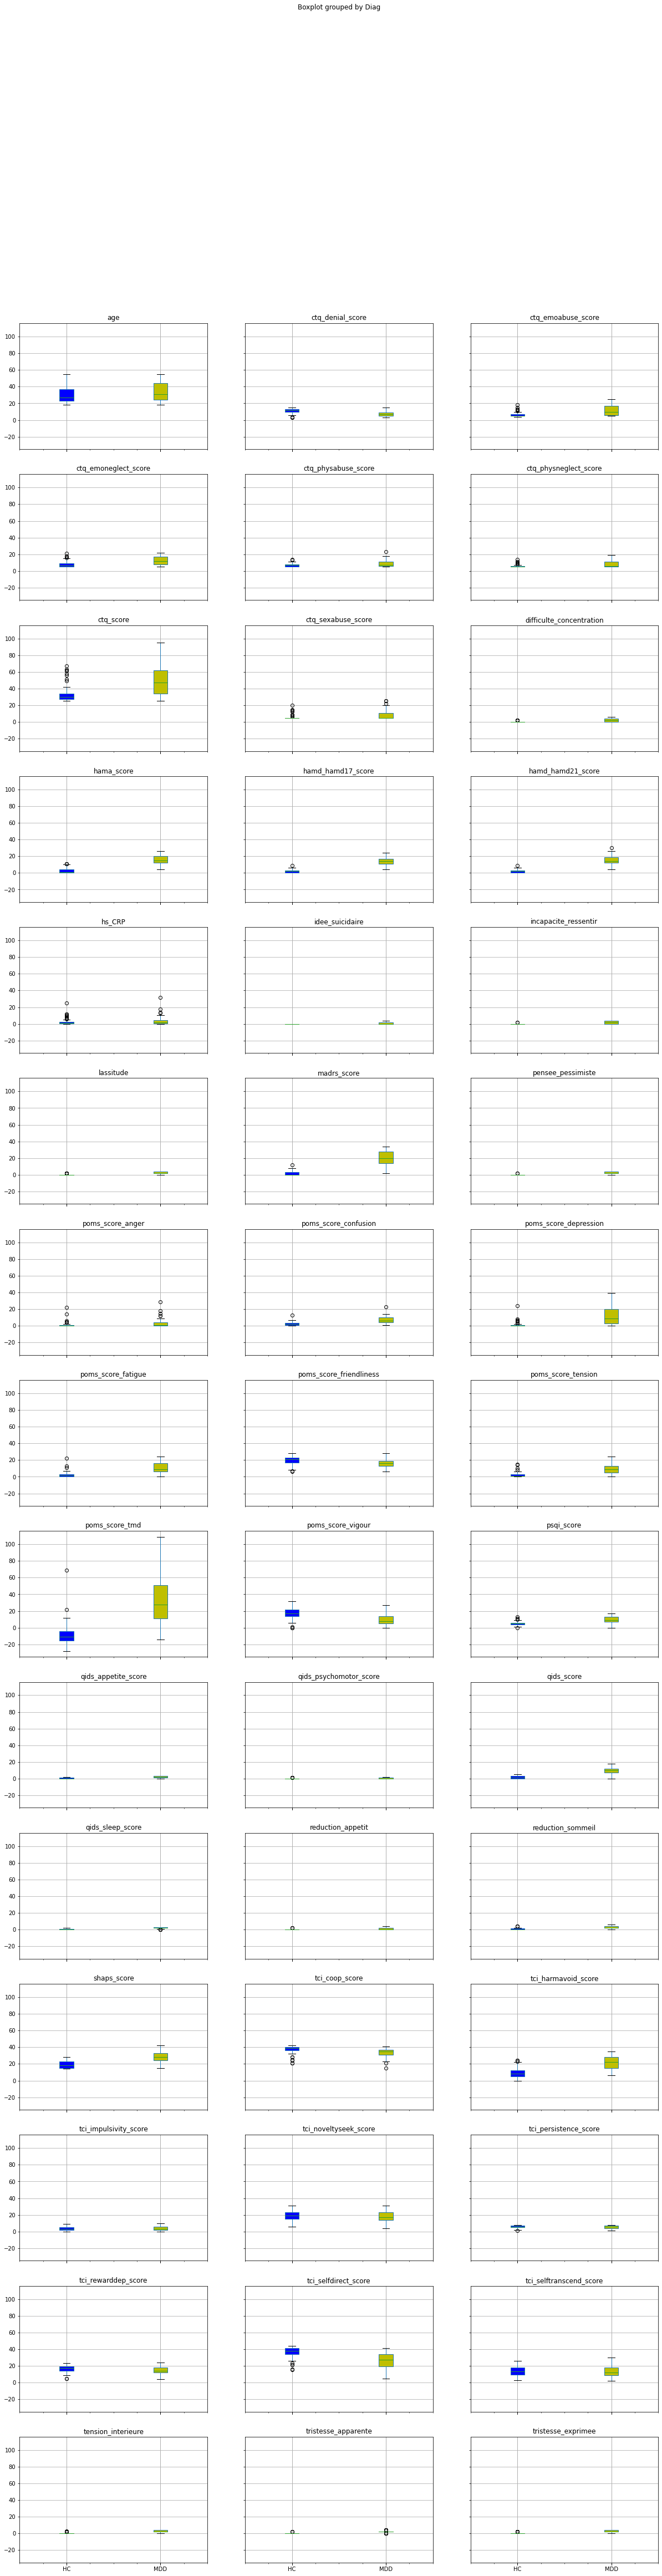

In [40]:
df = var_quanti
bp_dict = df.boxplot(
    by="Diag",layout=(20,3),figsize=(20,100),
    return_type='both',
    patch_artist = True,
)

colors = ['b', 'y', 'm', 'c', 'g', 'b', 'r', 'k', ]
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

poms : état émotionnel et dépressionnel, humeur
ctq : abus et négligence dans l'enfance
hama : anxiété
harmavoid : évitement du danger
les scores sont plus élevés et/ou plus largement répartis en MDD par rapport au groupe contrôle


In [41]:
print(demo_net_spd.info())
print(demo_net_spd.head())

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
batch                       123 non-null object
age                         123 non-null float64
sex                         123 non-null object
Diag                        123 non-null object
hs_CRP                      123 non-null float64
shaps_score                 123 non-null float64
psqi_score                  123 non-null float64
ctq_denial_score            123 non-null float64
ctq_emoabuse_score          123 non-null float64
ctq_emoneglect_score        123 non-null float64
ctq_physabuse_score         123 non-null float64
ctq_physneglect_score       123 non-null float64
ctq_sexabuse_score          123 non-null float64
ctq_score                   123 non-null float64
madrs_score                 123 non-null float64
hamd_hamd17_score           123 non-null float64
hamd_hamd21_score           123 non-null float64
hama_score                  123 non-null float64
poms_score_tens

MODELE DE PREDICTION

Sélection de variables / PCA

Etape de réalisation de PCA :

sélectionner les variables actives : les variables pour lesquelles on veut expliquer les relations - à projeter sur le plan orthogonal - idéal : même unité de mesure
centrer. réduire?
réaliser l'ACP
choisir le nombre de dimension à interpréter : vérifier le nombre de dimensions expliquant la variance, vérifier si la variance expliquée par les axes est suffisante au regard de n ind et p var
analyser les résultats de l'ajustement du nuage de points : projection des variables et barycentre des individus qui prennent les modalités d'une var quali
utiliser les indicateurs pour enrichir l'interprétation
revenir aux données brutes pour interpréter

pour réaliser une PCA, il faut un rapport de 3 entre n individus et p variables.


In [42]:
n = demo_net_spd.shape[0]
p = demo_net_spd.shape[1]
print("le nombre de variables pour l'acp doit être de : " + str(123/3) + " or nous avons " + str(p)+ " variables")

le nombre de variables pour l'acp doit être de : 41.0 or nous avons 48 variables


In [43]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

Nous cherchons à maximiser la variance expliquée par 2 axes. nous avons choisi de créer plusieurs ACP à partir des critères suivants :
- un ACP avec les variables relatives aux scores mesurant l'état psychologique (dépression) et émotionnel : soient les variables shaps, psqi, hamd17, hama, qids, madrs et poms (17 variables)
- un ACP avec les variables relatives aux scores mesurant le tempérament et le caractère : soient les variables tci (8 variables)
- un ACP avec les variables relatives aux scores mesurant les abus et négligences infantiles vécues : soient les variables ctq (7 variables)

Pour l'ACP 1 : 17 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 21% minimum avec le première axe

Pour l'ACP 2 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 36.3% minimum avec le première axe

Pour l'ACP 3 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables 
indépendantes, nous avons devons avoir une inertie à 40% minimum avec le première axe


on va supprimer les variables qualitatives et sex et age et hs_CRP afin de les comparer aux axes 


In [262]:
#sous-ensemble des scores de shaps, psqi, hamd17, hama, qids, madrs et poms

X = demo_net_spd[['shaps_score', 'psqi_score','madrs_score', 'hamd_hamd17_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")

123 observations et 17 variables.


In [263]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

VALEURS CENTREES ET REDUITES
[[ 0.2996143  -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-0.95198204 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-1.23011457 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 ...
 [ 0.57774682  0.29068457  0.5021063  ...  0.95700777 -0.47316022
   0.68048786]
 [ 2.66374073  0.29068457  1.28510565 ...  0.95700777 -0.47316022
   0.27019371]
 [ 2.38560821  0.02778603  1.67660533 ...  0.95700777 -0.47316022
   1.29592908]]


In [264]:
#vérification moyenne
print(np.mean(Z,axis=0))

[ 2.27460327e-16 -1.94063374e-17  6.13781835e-17 -9.02620345e-18
 -2.12115781e-17  1.80524069e-18 -2.52733697e-17 -1.62471662e-17
 -7.04043869e-17 -3.38482629e-17  0.00000000e+00 -9.02620345e-17
  2.16628883e-17  8.71028633e-17 -9.20672752e-17  6.13781835e-17
  1.44419255e-17]


In [265]:
#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [266]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [267]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

17


La matrice des valeurs singulières est créée.

In [268]:
#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.02524015e+01 1.51476231e+00 1.31184722e+00 8.86227317e-01
 5.77473095e-01 5.03588107e-01 4.59213977e-01 3.19035679e-01
 2.63474875e-01 2.34208340e-01 2.01500841e-01 1.69696708e-01
 1.42318940e-01 8.82798939e-02 4.58664272e-02 3.01047275e-02
 2.52598820e-32]


In [269]:
#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

proportion de variante expliquée
[6.03082444e-01 8.91036653e-02 7.71674834e-02 5.21310187e-02
 3.39690056e-02 2.96228298e-02 2.70125869e-02 1.87668046e-02
 1.54985221e-02 1.37769611e-02 1.18529907e-02 9.98215932e-03
 8.37170236e-03 5.19293493e-03 2.69802513e-03 1.77086632e-03
 1.48587541e-33]


Le premier axe explique 60% de la variance, le second 8.9%

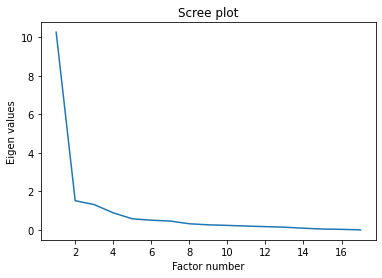

In [213]:
#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Les valeurs propres sont supérieures à 1 jusqu'au 3ème facteur. Selon le critère du coude, le décrochement
se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente un
éventuel intérêt.

In [270]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})

,Val.Propre,Seuils
0,1.025240e+01,3.439553
1,1.514762e+00,2.439553
2,1.311847e+00,1.939553
3,8.862273e-01,1.606219
4,5.774731e-01,1.356219
5,5.035881e-01,1.156219
6,4.592140e-01,0.989553
7,3.190357e-01,0.846695
8,2.634749e-01,0.721695
9,2.342083e-01,0.610584



La composante est validée si : la vp > seuil si l’inertie était répartie
aléatoirement sur les axes, la distribution des v.p. suivrait la loi des « bâtons brisés »
q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes


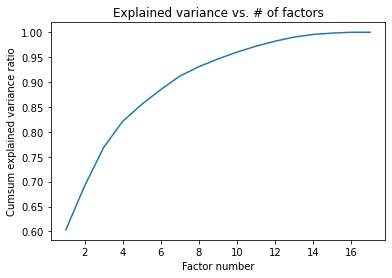

In [271]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points

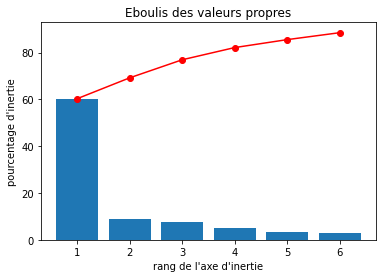

In [272]:
from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

Le premier facteur contient 60% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 70% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.

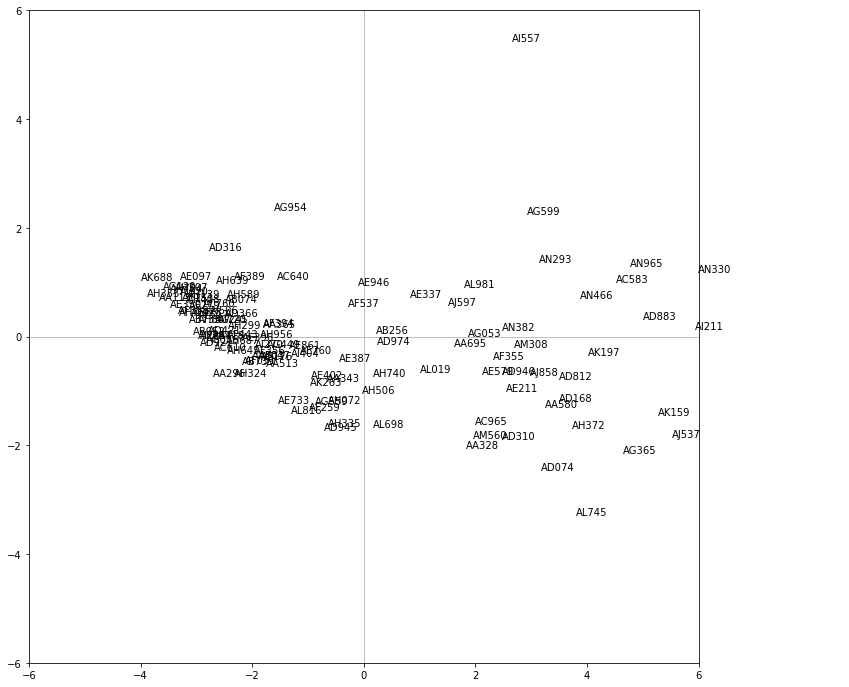

In [273]:
#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Un groupe d'individus est concentré à gauche du 1er axe. Les individus AK688 et AE097 peuvent se ressembler. D'autres individus sont dispersés de part et d'autres à droite du 1er axe. Les individus AD883 et AI211 peuvent avoir des ressemblances. L'individu AI211 est opposé à l'individu AK688. Ces individus peuvent ne pas avoir de ressemblance. Nous observons un individu isolé en haut à droite du second axe.  Il serait intéressant de vérifier le poids qu'à cet individu sur cette représentation.

In [274]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

        ID        d_i
0    AA003   8.134634
1    AA115  15.070343
2    AA296  11.908476
3    AA328  15.602426
4    AA343   4.069687
5    AA365   8.085626
6    AA418   8.794168
7    AA513   4.764004
8    AA580  17.124729
9    AA581  52.275768
10   AA695  12.818724
11   AB052   9.887954
12   AB074  10.235718
13   AB256   8.491364
14   AB735  10.891121
15   AB739   8.916957
16   AC583  29.223643
17   AC610   9.545638
18   AC640   7.408059
19   AC760  10.621350
20   AC788  51.178195
21   AC965  15.051452
22   AD074  22.408495
23   AD168  18.261767
24   AD246  62.439706
25   AD310  16.235542
26   AD316  11.183789
27   AD366   8.170436
28   AD421   9.500545
29   AD665  68.229945
30   AD812  18.916491
31   AD883  31.106976
32   AD921   9.426987
33   AD945  15.669736
34   AD946  14.479989
35   AD974   2.666321
36   AE097  17.635384
37   AE151  12.570044
38   AE176   8.043420
39   AE211  16.300595
40   AE337  15.399510
41   AE350  13.056851
42   AE387   4.435148
43   AE396   6.101763
44   AE402

In [277]:
#vérifions la somme des di

print(np.sum(di,axis=0))

2091.0


Normal de trouver un résultat de 2091 ?

In [219]:
df = pd.DataFrame({'ID':X.index,'d_i':di})
df.sort_values(by = 'd_i',ascending = False)

,ID,d_i
65,AG024,87.829249
117,AM894,85.692007
29,AD665,68.229945
24,AD246,62.439706
62,AF626,57.977776
9,AA581,52.275768
20,AC788,51.178195
105,AJ996,47.413864
119,AN330,47.393384
100,AI557,41.753210



Concrètement, les individus AM894, AG024, AD665, AD246 et AF626, sont  ceux qui se démarquent
le plus des autres, mais on ne les retrouve pas aux deux extrémités du premier axe factoriel qui porte
60% de l’information disponible.

on va quand même déduire la qualité de représentation des individus sur l’axe n°k 


In [247]:
#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

Qualité de représentation – Les COS² (cosinus carré).
        id    COS2_1    COS2_2
0    AA003  0.056361  0.181828
1    AA115  0.148671  0.377586
2    AA296  0.001158  0.157073
3    AA328  0.004928  0.197191
4    AA343  0.000955  0.100019
5    AA365  0.178811  0.002980
6    AA418  0.075788  0.885260
7    AA513  0.390799  0.006636
8    AA580  0.163580  0.295394
9    AA581  0.214934  0.000890
10   AA695  0.125126  0.132358
11   AB052  0.000003  0.005335
12   AB074  0.172074  0.545124
13   AB256  0.072005  0.336138
14   AB735  0.324312  0.505172
15   AB739  0.165607  0.358288
16   AC583  0.307871  0.292004
17   AC610  0.313250  0.015923
18   AC640  0.508716  0.199439
19   AC760  0.352632  0.004781
20   AC788  0.664018  0.013130
21   AC965  0.401686  0.295192
22   AD074  0.062391  0.387661
23   AD168  0.064942  0.277750
24   AD246  0.067401  0.133353
25   AD310  0.354814  0.005870
26   AD316  0.810123  0.113884
27   AD366  0.358590  0.015071
28   AD421  0.026652  0.556979
29   AD665  0.49

In [248]:
cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

,id,COS2_1,COS2_2,somme
117,AM894,0.976296,0.009091,0.985387
6,AA418,0.075788,0.885260,0.961048
86,AH639,0.234789,0.702842,0.937631
26,AD316,0.810123,0.113884,0.924007
61,AF537,0.862789,0.039508,0.902297
102,AJ537,0.786197,0.110123,0.896320
70,AG365,0.426006,0.463254,0.889260
108,AK263,0.443494,0.443721,0.887216
76,AH139,0.594232,0.287743,0.881975
87,AH645,0.761860,0.116262,0.878123


In [258]:
ab = (cos2_sum.somme >0.7)
cos2_sum[ab].count()/cos2_sum.shape[0]

123

Bien que les individus AG024, AM894 ou encore AD665 pèsent le plus pour la détermination du facteur 1, on ne les retrouve pas sur notre nuage de points. Ainsi, notre projection des individus sur le nuage de points n'est pas très représentative. De plus, la somme des cosinus associé à chaque individu est supérieure 0.7 pour 1/4 des individus. 3/4 des individus ont une mauvaise projection sur le plan.

In [243]:
#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

vérifions la théorie - somme en ligne des cos2 = 1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [223]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

        id         CTR_1         CTR_2
0    AA003  3.196915e-03  8.831351e-04
1    AA115  1.066907e-02  2.373540e-03
2    AA296  5.768825e-03  2.908501e-03
3    AA328  2.638493e-03  2.271932e-02
4    AA343  3.376798e-04  3.604758e-03
5    AA365  2.584059e-03  1.587049e-04
6    AA418  5.849530e-03  4.086306e-06
7    AA513  2.421308e-03  1.581303e-03
8    AA580  8.390693e-03  8.994523e-03
9    AA581  3.499915e-02  3.466019e-04
10   AA695  2.054675e-03  1.629160e-04
11   AB052  7.446494e-03  1.014977e-05
12   AB074  4.883469e-03  2.194176e-03
13   AB256  3.880326e-05  2.497128e-05
14   AB735  7.783776e-03  3.931804e-04
15   AB739  3.786010e-03  1.358259e-03
16   AC583  1.618959e-02  5.390996e-03
17   AC610  5.727406e-03  3.357785e-04
18   AC640  1.931967e-03  5.884537e-03
19   AC760  6.602845e-03  1.728330e-03
20   AC788  3.172758e-02  7.536603e-06
21   AC965  3.161473e-03  1.397228e-02
22   AD074  8.020078e-03  3.245103e-02
23   AD168  9.711438e-03  7.584708e-03
24   AD246  3.830809e-02 

In [224]:
#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

vérifions la théorie - somme en colonne des CTR
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [225]:
#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

[[ 2.34101640e-01  2.29769377e-01  2.89888609e-01  2.89157750e-01
   2.79469406e-01  2.55265310e-01  2.53582654e-01  1.54420646e-01
   2.50366592e-01 -1.52190089e-01  2.54997345e-01 -1.96339913e-01
   2.90732812e-01  2.21429870e-01  2.47419716e-01  1.57102533e-01
   2.90634963e-01]
 [-8.37871126e-02 -1.02902605e-01 -1.03395266e-01 -9.12462106e-02
  -1.01165380e-01  1.94809558e-01  3.39545205e-01  5.74299597e-01
   1.19605074e-01  3.82016845e-01  2.64110214e-01  3.58106404e-01
   1.98028143e-01 -1.23691324e-01 -1.57973719e-01 -1.30043177e-01
  -1.24337814e-01]
 [ 1.63101394e-01 -2.04692836e-01 -1.23940618e-01 -1.86569143e-01
  -2.00713464e-01  1.92317182e-02  4.90315907e-02  1.58523173e-01
  -2.79916603e-02 -5.40144120e-01  2.66534551e-01 -4.48095568e-01
   1.92053514e-01 -3.42631177e-01 -2.48928029e-01  7.27884857e-02
  -1.65004541e-01]
 [ 1.66867193e-03 -3.36466258e-01  1.07606268e-01  1.11949953e-01
   3.42657205e-02  9.65957866e-02  2.55411332e-02 -4.18555163e-02
  -2.20612864e-01  

In [279]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 7.49578739e-01 -1.03121559e-01  1.86809648e-01  1.57088187e-03
  -1.50115745e-01 -3.93119776e-01  4.20433391e-01  1.75634881e-02
  -1.45342743e-01 -6.86021006e-03 -1.21415730e-01  1.64180260e-02
  -2.81079436e-02 -3.61376720e-02  1.05728647e-02 -7.48716418e-03
  -2.61590473e-32]
 [ 7.35707107e-01 -1.26648081e-01 -2.34446780e-01 -3.16748148e-01
  -3.11533243e-01  1.76801585e-01  2.23241960e-01 -7.53151461e-02
   3.04906803e-01 -6.88158257e-02 -1.60328283e-02  4.78002453e-02
  -2.13807306e-02  5.23287480e-02 -1.17526539e-02 -5.28582296e-04
   6.14319539e-33]
 [ 9.28205107e-01 -1.27254427e-01 -1.41956501e-01  1.01300161e-01
   6.81844666e-02 -2.03147029e-01 -3.13861092e-02  4.21262054e-02
   3.31333277e-02  3.13908135e-02  9.19066924e-02 -5.45304880e-02
   4.44646169e-02  8.58279394e-02 -7.18669446e-02  1.23039289e-01
  -1.44661034e-32]
 [ 9.25864944e-01 -1.12301895e-01 -2.13688646e-01  1.05389291e-01
   1.15866359e-02 -7.95887310e-02 -4.80363029e-02  3.35398204e-02
  -2.42593976e-02 -

In [280]:
#Les variables sont maintenant en ligne, les facteurs en colonne :
print(X.shape)

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

(123, 17)
                         id     COR_1     COR_2
0               shaps_score  0.749579 -0.103122
1                psqi_score  0.735707 -0.126648
2               madrs_score  0.928205 -0.127254
3         hamd_hamd17_score  0.925865 -0.112302
4                hama_score  0.894843 -0.124510
5        poms_score_tension  0.817343  0.239763
6     poms_score_depression  0.811956  0.417898
7          poms_score_anger  0.494445  0.706823
8        poms_score_fatigue  0.801658  0.147205
9   poms_score_friendliness -0.487303  0.470170
10     poms_score_confusion  0.816485  0.325055
11        poms_score_vigour -0.628668  0.440742
12           poms_score_tmd  0.930908  0.243724
13         qids_sleep_score  0.709005 -0.152234
14      qids_appetite_score  0.792222 -0.194427
15   qids_psychomotor_score  0.503032 -0.160052
16               qids_score  0.930595 -0.153030


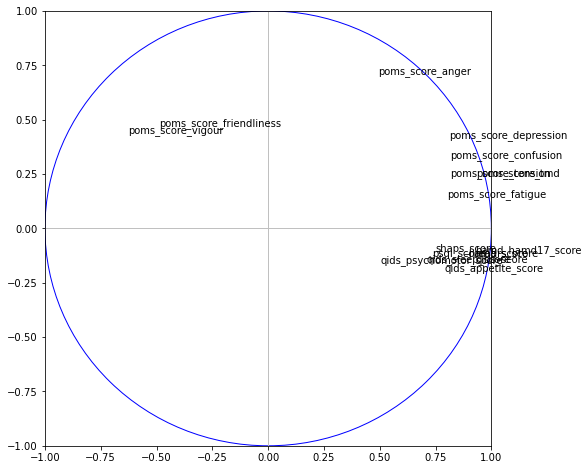

In [281]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [229]:
#qualité de représentation des variables
print("Qualité de représentation des variables")

Qualité de représentation des variables


In [287]:
#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
cos2var_df.sort_values(by = 'COS2_1',ascending = False)


,id,COS2_1,COS2_2,somme
12,poms_score_tmd,0.866590,0.059402,0.925992
16,qids_score,0.866007,0.023418,0.889425
2,madrs_score,0.861565,0.016194,0.877758
3,hamd_hamd17_score,0.857226,0.012612,0.869838
4,hama_score,0.800745,0.015503,0.816248
5,poms_score_tension,0.668050,0.057486,0.725537
10,poms_score_confusion,0.666649,0.105661,0.772310
6,poms_score_depression,0.659272,0.174638,0.833910
8,poms_score_fatigue,0.642656,0.021669,0.664325
14,qids_appetite_score,0.627616,0.037802,0.665418


les variables les plus corrélées au 1er axe sont : poms_score_tmd, qids_score, madrs_score, hamd_hamd17_score et hama_score


In [288]:
cos2var_df.sort_values(by = 'COS2_2',ascending = False)

,id,COS2_1,COS2_2,somme
7,poms_score_anger,0.244476,0.499599,0.744075
9,poms_score_friendliness,0.237464,0.221060,0.458524
11,poms_score_vigour,0.395224,0.194253,0.589477
6,poms_score_depression,0.659272,0.174638,0.833910
10,poms_score_confusion,0.666649,0.105661,0.772310
12,poms_score_tmd,0.866590,0.059402,0.925992
5,poms_score_tension,0.668050,0.057486,0.725537
14,qids_appetite_score,0.627616,0.037802,0.665418
15,qids_psychomotor_score,0.253042,0.025616,0.278658
16,qids_score,0.866007,0.023418,0.889425


Les variables ne sont pas très corrélées au 2nd axe

In [283]:
#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

verifions la théorie cos2var
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [290]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)

,id,CTR_1,CTR_2,somme
7,poms_score_anger,0.002326,0.217737,0.220063
9,poms_score_friendliness,0.002259,0.096343,0.098602
11,poms_score_vigour,0.003760,0.084660,0.088420
6,poms_score_depression,0.006272,0.076112,0.082384
10,poms_score_confusion,0.006342,0.046050,0.052392
12,poms_score_tmd,0.008244,0.025889,0.034133
5,poms_score_tension,0.006356,0.025054,0.031410
14,qids_appetite_score,0.005971,0.016475,0.022446
16,qids_score,0.008239,0.010206,0.018445
8,poms_score_fatigue,0.006114,0.009444,0.015558


Les variables les plus intéressantes sont poms_score_anger et poms_score_frienliness. Ce sont aussi celles qui ont de faibles corrélations avec les axes.

In [233]:
print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.

vérifions la théorie ctrvar
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [235]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

123 observations et 7 variables.
transformation – centrage-réduction
[[ 0.70845125 -0.72276622 -0.71892219 -0.21976227 -0.64371497 -0.00912539
  -0.61316989]
 [ 0.12557831 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.70845125 -0.72276622 -0.71892219 -0.85578013 -0.64371497 -0.4580948
  -0.86948219]
 [ 1.58276064 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [-0.45729462  0.09283236  0.54132621 -0.5377712   0.04478017 -0.4580948
  -0.0364672 ]
 [-0.74873108 -0.11106729  1.38149181  0.73426452  0.73327532  2.90917571
   1.50140664]
 [ 0.41701478 -0.72276622 -0.92896359 -0.21976227 -0.64371497 -0.4580948
  -0.80540412]
 [ 0.70845125 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.41701478 -0.72276622 -0.71892219 -0.21976227 -0.2994674  -0.4580948
  -0.67724796]
 [-1.33160402  2.74352775  1.59153321  4.8683806   1.76601804 -0.4580948
   2.52665586]
 [ 0.70845125 -0.31496693 -0.71892219 -0.21976227

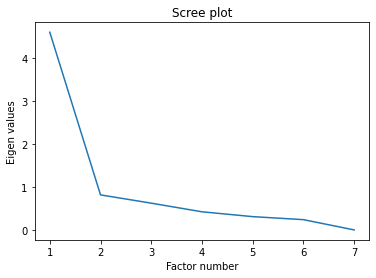

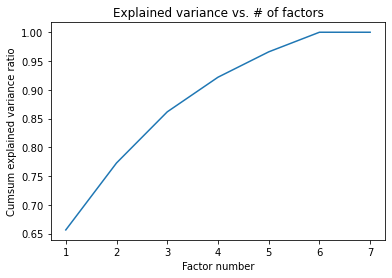

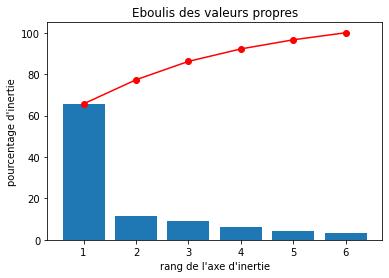

test des bâtons brisés
     Val.Propre    Seuils
0  4.595177e+00  2.592857
1  8.145065e-01  1.592857
2  6.219064e-01  1.092857
3  4.212121e-01  0.759524
4  3.086444e-01  0.509524
5  2.385539e-01  0.309524
6  1.791740e-32  0.142857


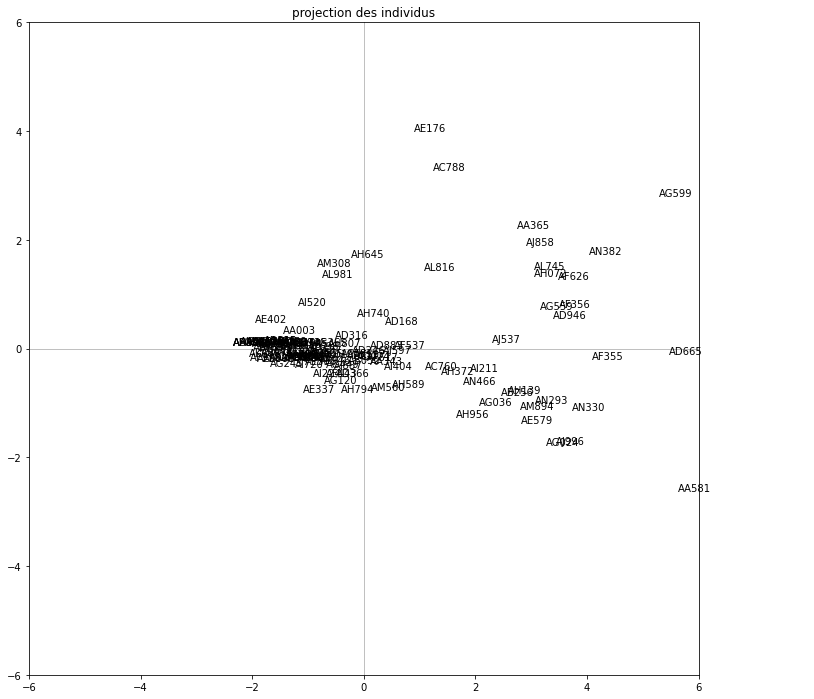

contribution des individus dans l'inertie totale
        ID        d_i
0    AA003   2.379868
1    AA115   3.629248
2    AA296   3.653722
3    AA328   6.118610
4    AA343   1.013154
5    AA365  14.275816
6    AA418   2.880457
7    AA513   4.115382
8    AA580   2.019633
9    AA581  45.246882
10   AA695   2.166449
11   AB052   2.704940
12   AB074   3.706331
13   AB256  10.205485
14   AB735   2.373029
15   AB739   3.345296
16   AC583   2.038740
17   AC610   2.086432
18   AC640   3.418676
19   AC760   6.174466
20   AC788  12.914809
21   AC965   2.699350
22   AD074   1.179634
23   AD168   6.295090
24   AD246   2.719850
25   AD310   2.533610
26   AD316   2.172588
27   AD366   1.521714
28   AD421   4.613254
29   AD665  31.449919
30   AD812   3.629248
31   AD883   4.308476
32   AD921   6.118610
33   AD945   2.007058
34   AD946  15.197696
35   AD974   3.526295
36   AE097   5.073932
37   AE151   3.185483
38   AE176  18.599112
39   AE211   1.649667
40   AE337   8.215848
41   AE350   4.101844
42   

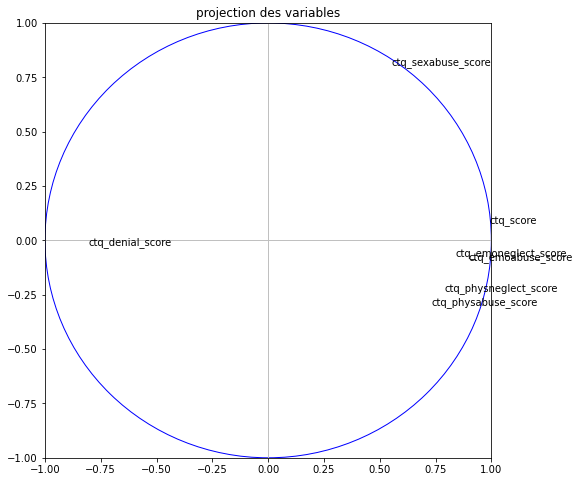

cosinus carré des variables
                      id    COS2_1    COS2_2
0       ctq_denial_score  0.645050  0.000418
1     ctq_emoabuse_score  0.801968  0.007800
2   ctq_emoneglect_score  0.703015  0.004819
3    ctq_physabuse_score  0.538891  0.088785
4  ctq_physneglect_score  0.620833  0.054644
5     ctq_sexabuse_score  0.305935  0.651958
6              ctq_score  0.979484  0.006083
vérification
[1. 1. 1. 1. 1. 1. 1.]
contributions des variables aux axes
                      id     CTR_1     CTR_2
0       ctq_denial_score  0.140375  0.000513
1     ctq_emoabuse_score  0.174524  0.009576
2   ctq_emoneglect_score  0.152990  0.005916
3    ctq_physabuse_score  0.117273  0.109005
4  ctq_physneglect_score  0.135105  0.067089
5     ctq_sexabuse_score  0.066577  0.800433
6              ctq_score  0.213155  0.007469
vérification
[1. 1. 1. 1. 1. 1. 1.]


In [236]:
#sous-ensemble des scores de ctq

X = demo_net_spd[['ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score']]

n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")

#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("transformation – centrage-réduction")
print(Z)

#moyenne
print("moyenne")
print(np.mean(Z,axis=0))

#écart-type
print("VERIFICATION ECART TYPE")
print(np.std(Z,axis=0,ddof=0))

 #calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print("nombre de composantes calculées")
print(acp.n_components_)

#variance corrigée
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print("valeur corrigée")
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variance expliquée - axes")
print(acp.explained_variance_ratio_)

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print("test des bâtons brisés")
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.title("projection des individus")
plt.show()

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print("contribution des individus dans l'inertie totale")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame({'ID':X.index,'d_i':di}))

df = pd.DataFrame({'ID':X.index,'d_i':di})
df.sort_values(by = 'd_i',ascending = False)

#qualité de représentation des individus - COS2
cos2 = coord**2
print("qualité de représentation des individus - COS2")
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
print("contributions aux axes")
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie")
print(np.sum(ctr,axis=0))


#REPRESENTATION DES VARIABLES


#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print("matrice de corrélation variables x facteurs")
print(corvar)
#Les variables sont maintenant en ligne, les facteurs en colonne :

#on affiche pour les deux premiers axes
print("corrélation aux 2 premiers axes")
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title("projection des variables")
plt.show()

#qualité de représentations des variables
cos2var = corvar**2
print("cosinus carré des variables")
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

#vérifions la théorie
print("vérification")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print("contributions des variables aux axes")
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

print("vérification")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.

In [237]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

123 observations et 8 variables.
transformation – centrage-réduction
[[ 0.21839627  0.35066791  0.59231572 -1.41844951  0.31998904  0.32115552
  -1.02449641  0.9257163 ]
 [ 1.13209497  0.57590109 -1.94913196 -0.30718015  0.79418966  0.99833489
   0.0739985  -1.15968855]
 [ 0.03565653 -0.66288138 -0.76312304 -1.41844951 -0.62841221  0.88547166
  -1.3383521  -0.32552661]
 [ 0.58387575  1.3642172  -0.76312304  1.3597239   0.55708935 -0.58175029
  -0.55371288 -0.32552661]
 [ 0.21839627  1.70206696 -0.5936932   0.24845453  0.79418966  0.09542907
   1.01556556 -1.15968855]
 [-1.97448061 -0.66288138 -0.5936932   0.24845453 -0.86551252  0.09542907
  -0.23985719  0.9257163 ]
 [ 0.76661549  0.12543474 -2.11856181  0.80408921 -0.86551252  1.22406134
  -0.71064072 -1.57676953]
 [ 0.76661549  0.23805132  0.08402618 -0.30718015  1.26839028  0.99833489
  -0.08292935 -0.74260758]
 [-0.14708321  1.25160061 -0.5936932  -0.30718015 -0.3913119  -0.69461352
   0.38785418 -1.57676953]
 [-2.33996009  1.25160

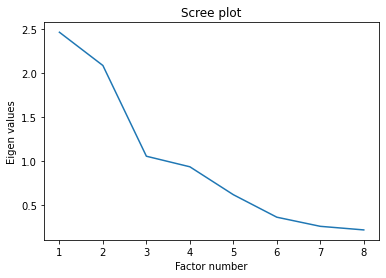

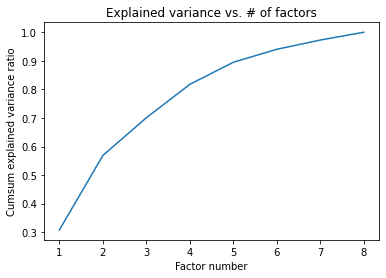

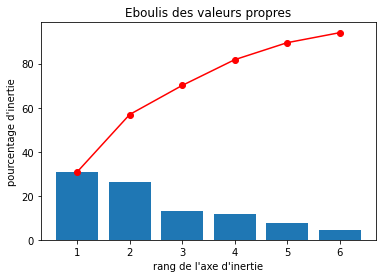

test des bâtons brisés
   Val.Propre    Seuils
0    2.464168  2.717857
1    2.086202  1.717857
2    1.055569  1.217857
3    0.935508  0.884524
4    0.618464  0.634524
5    0.362739  0.434524
6    0.259082  0.267857
7    0.218268  0.125000


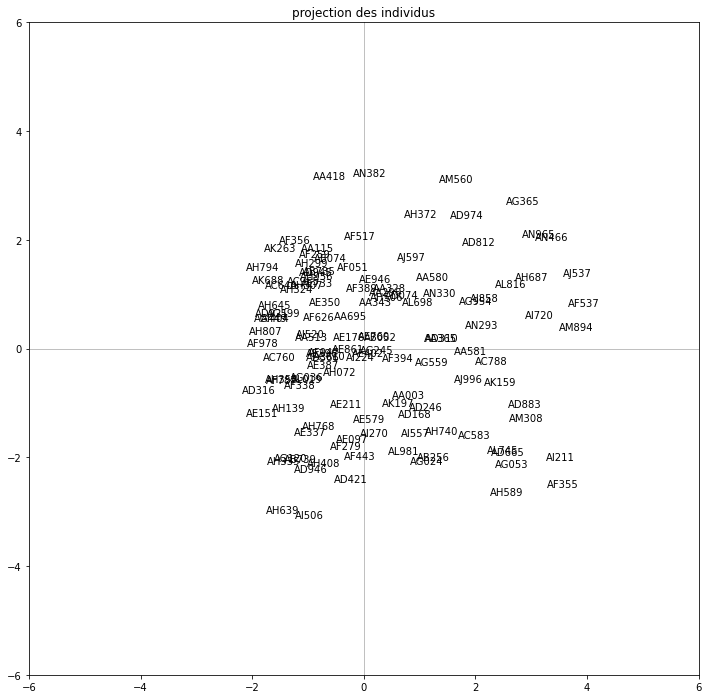

contribution des individus dans l'inertie totale
        ID        d_i
0    AA003   4.645579
1    AA115   8.484539
2    AA296   6.111155
3    AA328   5.694553
4    AA343   6.375025
5    AA365   6.424887
6    AA418  10.976947
7    AA513   3.909618
8    AA580   5.307215
9    AA581  12.210192
10   AA695   2.249021
11   AB052   4.752409
12   AB074   4.690569
13   AB256  12.606245
14   AB735   3.669761
15   AB739  12.302251
16   AC583   9.222418
17   AC610   2.600686
18   AC640   6.184101
19   AC760   9.279549
20   AC788   5.978009
21   AC965   4.698709
22   AD074   2.218157
23   AD168   5.801601
24   AD246   9.579946
25   AD310   3.413203
26   AD316   5.836065
27   AD366   3.037156
28   AD421  10.777465
29   AD665  10.548894
30   AD812  10.281227
31   AD883  16.243152
32   AD921   6.268968
33   AD945   6.806317
34   AD946  10.492242
35   AD974  10.316681
36   AE097   6.962535
37   AE151   7.515191
38   AE176   1.856752
39   AE211   2.210193
40   AE337   5.563668
41   AE350   2.782595
42   

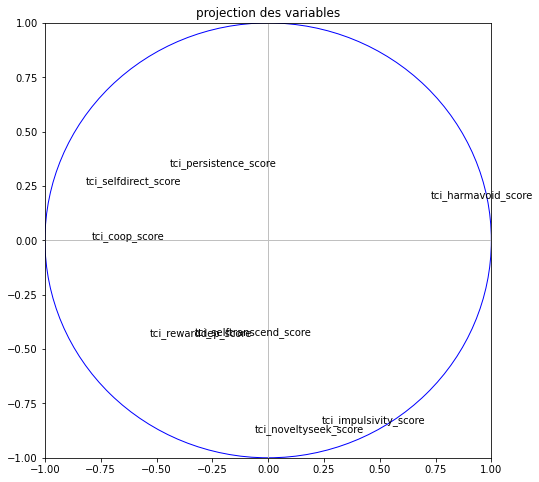

cosinus carré des variables
                        id    COS2_1    COS2_2
0           tci_coop_score  0.620935  0.000036
1      tci_harmavoid_score  0.528521  0.038894
2    tci_noveltyseek_score  0.003581  0.778849
3    tci_persistence_score  0.194610  0.117992
4      tci_rewarddep_score  0.279538  0.192626
5     tci_selfdirect_score  0.669536  0.067448
6  tci_selftranscend_score  0.108913  0.188380
7    tci_impulsivity_score  0.058534  0.701976
vérification
[1. 1. 1. 1. 1. 1. 1. 1.]
contributions des variables aux axes
                        id     CTR_1     CTR_2
0           tci_coop_score  0.251986  0.000017
1      tci_harmavoid_score  0.214483  0.018644
2    tci_noveltyseek_score  0.001453  0.373334
3    tci_persistence_score  0.078976  0.056558
4      tci_rewarddep_score  0.113441  0.092333
5     tci_selfdirect_score  0.271709  0.032331
6  tci_selftranscend_score  0.044199  0.090298
7    tci_impulsivity_score  0.023754  0.336485
vérification
[1. 1. 1. 1. 1. 1. 1. 1.]


In [238]:
#sous-ensemble des scores de tci

X = demo_net_spd[['tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")

#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("transformation – centrage-réduction")
print(Z)

#moyenne
print("moyenne")
print(np.mean(Z,axis=0))

#écart-type
print("VERIFICATION ECART TYPE")
print(np.std(Z,axis=0,ddof=0))

 #calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print("nombre de composantes calculées")
print(acp.n_components_)

#variance corrigée
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print("valeur corrigée")
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variance expliquée - axes")
print(acp.explained_variance_ratio_)

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print("test des bâtons brisés")
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.title("projection des individus")
plt.show()

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print("contribution des individus dans l'inertie totale")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame({'ID':X.index,'d_i':di}))

df = pd.DataFrame({'ID':X.index,'d_i':di})
df.sort_values(by = 'd_i',ascending = False)

#qualité de représentation des individus - COS2
cos2 = coord**2
print("qualité de représentation des individus - COS2")
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
print("contributions aux axes")
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie")
print(np.sum(ctr,axis=0))


#REPRESENTATION DES VARIABLES


#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print("matrice de corrélation variables x facteurs")
print(corvar)
#Les variables sont maintenant en ligne, les facteurs en colonne :

#on affiche pour les deux premiers axes
print("corrélation aux 2 premiers axes")
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.title("projection des variables")
plt.show()

#qualité de représentations des variables
cos2var = corvar**2
print("cosinus carré des variables")
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

#vérifions la théorie
print("vérification")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print("contributions des variables aux axes")
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

print("vérification")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.